In [499]:
! pip install -r requirements.txt

In [388]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import  ttest_ind
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data.csv")
df.head(5)

id  age  gender  education  ADS  speech_ratio_neg  speech_ratio_pos  \
0  2274   22  female         14   16          0.907169          0.895368   
1  2275   21  female         13   15          0.883506          0.879200   
2  2276   21  female         13   23          0.863110          0.841594   
3  2282   23    male         16   12          0.842673          0.836735   
4  2283   28    male         17   15          0.819487          0.625387   

   harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
0                     12.267561                     11.590832   
1                     14.369169                      6.955338   
2                     13.401637                     12.859636   
3                      4.736998                      5.777533   
4                      5.536166                      5.677916   

   sound_to_noise_ratio_neg  ...  mean_cluster_density_neg  \
0                  0.000002  ...                  4.666667   
1                  0.000019  ...                 89.000000   
2                  0.000020  ...                 76.000000   
3                  0.000067  ...                  4.187500   
4                  0.000200  ...                  2.600000   

   mean_cluster_density_pos  biggest_cluster_density_neg  \
0                 68.000000                           28   
1                  4.666667                           89   
2                 49.000000                           76   
3                  3.047619                           17   
4                  2.800000                            9   

   biggest_cluster_density_pos  number_cluster_switches_neg  \
0                           68                           38   
1                           15                            0   
2                           49                            0   
3                           13                           58   
4                            6                            6   

   number_cluster_switches_pos  tangentiality_score_neg  \
0                            0                 0.603030   
1                           33                 0.708475   
2                            0                 0.557627   
3                           59                 0.650612   
4                            8                 0.933333   

   tangentiality_score_pos  coherence_metric_neg  coherence_metric_pos  
0                 0.183499              1.045455              0.810811  
1                 0.329545              0.949153              0.937500  
2                 0.531034              0.949153              0.896552  
3                 0.404706              1.061225              0.640000  
4                 0.711111              1.333333              0.888889  

[5 rows x 215 columns]

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 215 entries, id to coherence_metric_pos
dtypes: float64(190), int64(24), object(1)
memory usage: 203.4+ KB


In [390]:
df.shape

(121, 215)

#### Genger is a catigorical variable. It should be transformed to numerical

In [391]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [392]:
# Coding categorical feature "gender" as 0- male , 1- female
df_gender = df['gender'].map(lambda x:0 if x=='male' else 1)
df['gender'] = df_gender
df.head()

id  age  gender  education  ADS  speech_ratio_neg  speech_ratio_pos  \
0  2274   22       1         14   16          0.907169          0.895368   
1  2275   21       1         13   15          0.883506          0.879200   
2  2276   21       1         13   23          0.863110          0.841594   
3  2282   23       0         16   12          0.842673          0.836735   
4  2283   28       0         17   15          0.819487          0.625387   

   harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
0                     12.267561                     11.590832   
1                     14.369169                      6.955338   
2                     13.401637                     12.859636   
3                      4.736998                      5.777533   
4                      5.536166                      5.677916   

   sound_to_noise_ratio_neg  ...  mean_cluster_density_neg  \
0                  0.000002  ...                  4.666667   
1                  0.000019  ...                 89.000000   
2                  0.000020  ...                 76.000000   
3                  0.000067  ...                  4.187500   
4                  0.000200  ...                  2.600000   

   mean_cluster_density_pos  biggest_cluster_density_neg  \
0                 68.000000                           28   
1                  4.666667                           89   
2                 49.000000                           76   
3                  3.047619                           17   
4                  2.800000                            9   

   biggest_cluster_density_pos  number_cluster_switches_neg  \
0                           68                           38   
1                           15                            0   
2                           49                            0   
3                           13                           58   
4                            6                            6   

   number_cluster_switches_pos  tangentiality_score_neg  \
0                            0                 0.603030   
1                           33                 0.708475   
2                            0                 0.557627   
3                           59                 0.650612   
4                            8                 0.933333   

   tangentiality_score_pos  coherence_metric_neg  coherence_metric_pos  
0                 0.183499              1.045455              0.810811  
1                 0.329545              0.949153              0.937500  
2                 0.531034              0.949153              0.896552  
3                 0.404706              1.061225              0.640000  
4                 0.711111              1.333333              0.888889  

[5 rows x 215 columns]

#### It is not enough data  to devide data on to subsets by gender. So I will first explore and learn models with entire dataset.
#### I will compare results afterwards.

#### This dataset has 215 features. For more comfortable exploration I look at the feature cuts according the task description 

In [393]:
df.describe().iloc[:,:4]

id         age      gender   education
count   121.000000  121.000000  121.000000  121.000000
mean   2655.677686   24.190083    0.776860   15.338843
std     276.549821    6.513210    0.418083    2.357802
min    2274.000000   18.000000    0.000000    8.000000
25%    2456.000000   21.000000    1.000000   14.000000
50%    2540.000000   23.000000    1.000000   15.000000
75%    2980.000000   26.000000    1.000000   17.000000
max    3078.000000   75.000000    1.000000   20.000000

In [394]:
df.describe().iloc[:,4:172]

ADS  speech_ratio_neg  speech_ratio_pos  \
count  121.000000        121.000000        121.000000   
mean    17.925620          0.842633          0.852513   
std      5.611247          0.075489          0.066058   
min      6.000000          0.357698          0.572709   
25%     14.000000          0.805957          0.824108   
50%     17.000000          0.857048          0.866193   
75%     20.000000          0.887169          0.890800   
max     43.000000          0.961089          0.983748   

       harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
count                    121.000000                    121.000000   
mean                       9.827638                      9.962752   
std                        2.295874                      2.290284   
min                        2.360100                      4.440766   
25%                        8.751434                      8.609546   
50%                       10.063441                     10.288484   
75%                       11.431016                     11.400883   
max                       14.696699                     15.559671   

       sound_to_noise_ratio_neg  sound_to_noise_ratio_pos  mean_f0_neg  \
count                121.000000              1.210000e+02   121.000000   
mean                  -0.000012             -3.984316e-06   133.485793   
std                    0.000103              8.802190e-05    28.136791   
min                   -0.000562             -4.126630e-04    68.927343   
25%                   -0.000035             -1.927120e-05   123.334605   
50%                   -0.000009             -6.117460e-07   142.296196   
75%                    0.000014              1.966810e-05   152.087466   
max                    0.000537              5.562160e-04   183.569318   

       mean_f0_pos   sd_f0_neg  ...  jitter_absolute_neg  jitter_rap_neg  \
count   121.000000  121.000000  ...           111.000000      111.000000   
mean    134.950909   27.508810  ...             0.000598        0.039822   
std      28.093793   16.210608  ...             0.000182        0.006632   
min      71.563997    5.208011  ...             0.000339        0.026184   
25%     123.103420   18.831735  ...             0.000459        0.036412   
50%     143.469110   25.469088  ...             0.000535        0.038743   
75%     154.750548   32.669166  ...             0.000758        0.043024   
max     180.554764  127.985477  ...             0.001048        0.060644   

       jitter_ppq5_neg  jitter_ddp_neg  jitter_local_pos  jitter_absolute_pos  \
count       111.000000      111.000000        109.000000           109.000000   
mean          0.042345        0.119466          0.075525             0.000583   
std           0.009041        0.019896          0.013479             0.000178   
min           0.024698        0.078551          0.048860             0.000320   
25%           0.037478        0.109236          0.066096             0.000440   
50%           0.040755        0.116230          0.073502             0.000504   
75%           0.044927        0.129072          0.081344             0.000699   
max           0.086087        0.181931          0.116601             0.000997   

       jitter_rap_pos  jitter_ppq5_pos  jitter_ddp_pos  \
count      109.000000       109.000000      109.000000   
mean         0.039512         0.041339        0.118535   
std          0.007087         0.008193        0.021262   
min          0.025332         0.024025        0.075995   
25%          0.034959         0.036203        0.104876   
50%          0.038379         0.040147        0.115138   
75%          0.041900         0.043885        0.125701   
max          0.059389         0.068051        0.178167   

       mean_utterance_distance_neg  
count                   121.000000  
mean                      0.000776  
std                       0.002119  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%           

In [395]:
df.describe().iloc[:,172:]


mean_utterance_distance_pos  verb_rate_neg  verb_rate_pos  \
count                   121.000000     121.000000     121.000000   
mean                      0.000712       0.101682       0.098643   
std                       0.002033       0.027292       0.028285   
min                       0.000000       0.039216       0.000000   
25%                       0.000000       0.083333       0.082353   
50%                       0.000000       0.100917       0.101010   
75%                       0.000000       0.118644       0.116279   
max                       0.010221       0.163265       0.191489   

       adverb_rate_neg  adverb_rate_pos  noun_rate_neg  noun_rate_pos  \
count       121.000000       121.000000     121.000000     121.000000   
mean          0.205251         0.210784       0.113172       0.111640   
std           0.067566         0.061852       0.035220       0.036485   
min           0.000000         0.040000       0.044872       0.036364   
25%           0.169811         0.161616       0.092105       0.081522   
50%           0.210145         0.206061       0.107143       0.112676   
75%           0.258065         0.254673       0.132576       0.131868   
max           0.360656         0.364706       0.250000       0.272727   

       adjective_rate_neg  adjective_rate_pos  pronoun_rate_neg  ...  \
count          121.000000          121.000000        121.000000  ...   
mean             0.054521            0.055974          0.145358  ...   
std              0.035707            0.033355          0.039343  ...   
min              0.000000            0.000000          0.049180  ...   
25%              0.036269            0.033333          0.123188  ...   
50%              0.046358            0.047619          0.142857  ...   
75%              0.066667            0.071429          0.161290  ...   
max              0.214286            0.159091          0.269841  ...   

       mean_cluster_density_neg  mean_cluster_density_pos  \
count                121.000000                121.000000   
mean                 111.755255                107.022935   
std                  154.364598                116.996663   
min                    2.125000                  2.666667   
25%                    3.937500                  4.272727   
50%                   75.000000                 80.000000   
75%                  156.000000                151.000000   
max                  952.000000                514.000000   

       biggest_cluster_density_neg  biggest_cluster_density_pos  \
count                   121.000000                   121.000000   
mean                    117.206612                   111.107438   
std                     150.657775                   113.506373   
min                       7.000000                     6.000000   
25%                      17.000000                    21.000000   
50%                      75.000000                    80.000000   
75%                     156.000000                   151.000000   
max                     952.000000                   514.000000   

       number_cluster_switches_neg  number_cluster_switches_pos  \
count                   121.000000                   121.000000   
mean                     15.438017                    12.074380   
std                      23.974602                    22.459655   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                      26.000000                    16.000000   
max                      89.000000                   110.000000   

       tangentiality_score_neg  tangentiality_score_pos  coherence_metric_neg  \
count               121.000000               121.000000            121.000000   
mean                  0.514550                 0.479387              0.966239   
std                   0.145740                 0.139133              0.164670   
min  

In [396]:
df_demograph = df.iloc[:,:4]
df_demograph.head()
df_sf = df.iloc[:,5:172]
df_tf = df.iloc[:,172:]


### Previous data exploration shows that ADS can be a target variable. It is possible to classify participants as 
0 - "has dipressive symptoms", 
1 - "has no dipressive symptoms"

In [397]:
df['ADS_cat']=df['ADS'].map(lambda x: 1 if x>17 else 0)
df

id  age  gender  education  ADS  speech_ratio_neg  speech_ratio_pos  \
0    2274   22       1         14   16          0.907169          0.895368   
1    2275   21       1         13   15          0.883506          0.879200   
2    2276   21       1         13   23          0.863110          0.841594   
3    2282   23       0         16   12          0.842673          0.836735   
4    2283   28       0         17   15          0.819487          0.625387   
..    ...  ...     ...        ...  ...               ...               ...   
116  3070   24       0         17   15          0.765217          0.853586   
117  3073   23       1         17   23          0.894306          0.936970   
118  3075   18       1         12   31          0.857977          0.914830   
119  3076   23       1         17   14          0.884004          0.910006   
120  3078   18       1         12   14          0.883390          0.866193   

     harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
0                       12.267561                     11.590832   
1                       14.369169                      6.955338   
2                       13.401637                     12.859636   
3                        4.736998                      5.777533   
4                        5.536166                      5.677916   
..                            ...                           ...   
116                      6.132250                      7.003487   
117                      8.112566                      8.586537   
118                     11.764311                      9.514169   
119                      9.820658                     12.362806   
120                     11.433758                     10.594856   

     sound_to_noise_ratio_neg  ...  mean_cluster_density_pos  \
0                    0.000002  ...                 68.000000   
1                    0.000019  ...                  4.666667   
2                    0.000020  ...                 49.000000   
3                    0.000067  ...                  3.047619   
4                    0.000200  ...                  2.800000   
..                        ...  ...                       ...   
116                 -0.000094  ...                  3.117647   
117                  0.000032  ...                 53.000000   
118                 -0.000011  ...                  3.562500   
119                 -0.000022  ...                 63.000000   
120                 -0.000048  ...                 62.000000   

     biggest_cluster_density_neg  biggest_cluster_density_pos  \
0                             28                           68   
1                             89                           15   
2                             76                           49   
3                             17                           13   
4                              9                            6   
..                           ...                          ...   
116                           17                           15   
117                          116                           53   
118                           17                           11   
119                           50                           63   
120                          141                           62   

     number_cluster_switches_neg  number_cluster_switches_pos  \
0                             38                            0   
1                              0                           33   
2                              0                            0   
3                             58                           59   
4                              6                            8   
..                           ...                          ...   
116                           11                           43   
117                            0                            0   
118                           20                           50   
119                            0                            0   


## Data preparation

#### Let's explore all features with NaN or 0 values

In [398]:
def findNaNColumn (df):
    nan_columns = np.array([])
    for i in df.columns:
        if df[i].isnull().values.any():
            nan_columns = np.append(nan_columns, i)
    return nan_columns


In [399]:
a = findNaNColumn(df)
print(a)

['jitter_local_neg' 'jitter_absolute_neg' 'jitter_rap_neg'
 'jitter_ppq5_neg' 'jitter_ddp_neg' 'jitter_local_pos'
 'jitter_absolute_pos' 'jitter_rap_pos' 'jitter_ppq5_pos' 'jitter_ddp_pos']


In [400]:
def nan_amount(df,a):
    for i in a:
        percent = str(round(df[i].isnull().sum()*100/df[i].count()))        
        print(f"{i}: {percent}%")

In [401]:
# Amount of NaN data in columns
nan_amount(df,a)
 

jitter_local_neg: 9%
jitter_absolute_neg: 9%
jitter_rap_neg: 9%
jitter_ppq5_neg: 9%
jitter_ddp_neg: 9%
jitter_local_pos: 11%
jitter_absolute_pos: 11%
jitter_rap_pos: 11%
jitter_ppq5_pos: 11%
jitter_ddp_pos: 11%


#### NaN data here takes just near 10%, so it can be replaced by median values 

In [402]:
def replaceNanOnMedian(a):
    for i in a:
        df[i] = df[i].fillna(df[i].median())



In [403]:
replaceNanOnMedian(a)

#### Columns with all zero values can be deleted 

In [404]:
for i in df.columns:
    if df[i].mean() == 0.0:
        print(i+": "+str(df[i].mean()))

espinola_zero_crossing_metric_pos: 0.0
mean_number_subordinate_clauses_neg: 0.0
mean_number_subordinate_clauses_pos: 0.0


In [405]:
df['espinola_zero_crossing_metric_pos'].unique()

array([0])

In [406]:
df['mean_number_subordinate_clauses_neg'].unique()

array([0])

In [407]:
df['mean_number_subordinate_clauses_pos'].unique()

array([0])

In [408]:
df =df.drop(['espinola_zero_crossing_metric_pos','mean_number_subordinate_clauses_neg','mean_number_subordinate_clauses_pos'], axis = 1)


## Outliers influence elimination


#### For more accurate results feature sets should be normally distributed

### Demographical features

In [409]:
from scipy.stats import norm

<AxesSubplot:xlabel='ADS', ylabel='Density'>

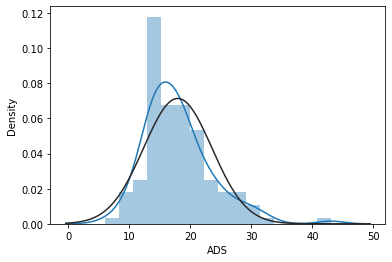

In [410]:
sns.distplot(df['ADS'], fit = norm)

In [411]:
df['ADS'].skew()

1.2106132338523006

In [412]:
df['ADS'].kurtosis()

2.8349770036934183

<AxesSubplot:xlabel='ADS'>

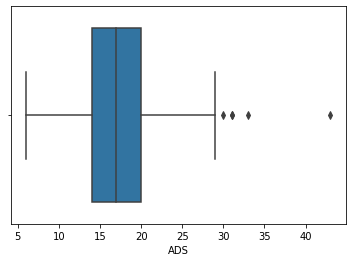

In [413]:
sns.boxplot(df['ADS'])

#### We can see that ADS has outliers, that is why it has right skew and quite big kurtosis

#### Let's try to normalise this feature set

### ADS Normality Exploration

In [414]:
#calculate lower and upper limit values for a sample
feature = 'ADS'
def boundary_values (feature):
    feature_q25,feature_q75 = np.percentile(df[feature], 25), np.percentile(df[feature], 75)
    feature_IQR = feature_q75 - feature_q25
    Threshold = feature_IQR * 1.5 #interquartile range (IQR)
    feature_lower, feature_upper = feature_q25 - Threshold, feature_q75 + Threshold
    print(f"Lower limit of {feature} distribution: {feature_lower}")
    print(f"Upper limit of {feature} distribution: {feature_upper}")
    return feature_lower,feature_upper;

In [415]:
#calculate limits
x,y = boundary_values(feature)

Lower limit of ADS distribution: 5.0
Upper limit of ADS distribution: 29.0


In [416]:
def manage_outliers(df,feature_lower,feature_upper):
    df_copy = df.copy()
    df_copy.loc[(df_copy[feature] > feature_upper),feature] = np.nan
    df_copy['ADS'].fillna(feature_upper, inplace=True)
    df_copy.loc[(df_copy[feature] < feature_lower),feature] = np.nan
    df_copy['ADS'].fillna(feature_lower, inplace=True)
    return df_copy;

In [417]:
df = manage_outliers(df,x,y)

In [418]:
df.agg(['skew', 'kurtosis']).transpose().loc['ADS']

skew        0.553851
kurtosis   -0.036457
Name: ADS, dtype: float64

<AxesSubplot:xlabel='ADS', ylabel='Density'>

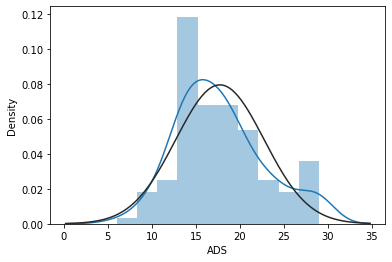

In [419]:
sns.distplot(df['ADS'], fit = norm)

#### These transformations helped to decrease outlier influenses as we see on the graph and by skew/kurtosis indexes

In [420]:
### Age Normality Exploration

<AxesSubplot:xlabel='age', ylabel='Density'>

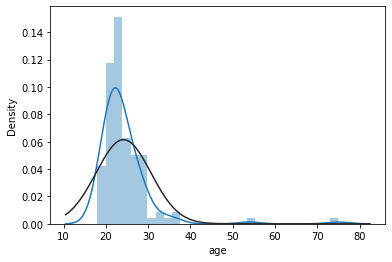

In [421]:
sns.distplot(df['age'], fit = norm)

In [422]:
#calculate limits
feature='age'
x,y = boundary_values(feature)


Lower limit of age distribution: 13.5
Upper limit of age distribution: 33.5


In [423]:

n = df[df['age']>33.5]['age'].count()
print("Age outliers amount: "+str(n))

Age outliers amount: 5


In [424]:
print(str(n*100/df['age'].shape)+"%")

[4.1322314]%


### Gender Normality Exploration

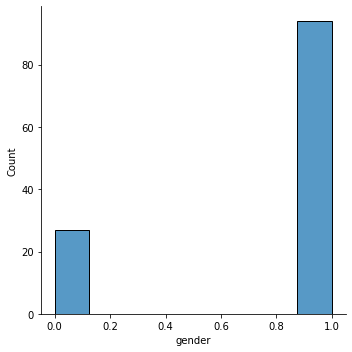

In [425]:
sns.displot(df['gender'])

#### Women in test ~ 3 times more then men. It can influence on the quality of training further

### Education Normality Exploration

<AxesSubplot:xlabel='education', ylabel='Density'>

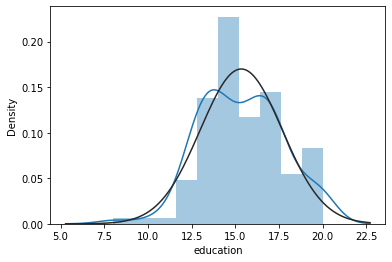

In [426]:
sns.distplot(df['education'], fit = norm)

In [427]:
df.agg(['skew', 'kurtosis']).transpose().loc['education']

skew        0.007860
kurtosis   -0.137656
Name: education, dtype: float64

#### Education is more-less normally distributed. It can be fixed by standartisation on the next step 

### Speech Features / Transcript Features Normality Exploration

In [428]:
df_sf= df.iloc[:,5:172]
df_sf

speech_ratio_neg  speech_ratio_pos  harmonics_to_noise_ratio_neg  \
0            0.907169          0.895368                     12.267561   
1            0.883506          0.879200                     14.369169   
2            0.863110          0.841594                     13.401637   
3            0.842673          0.836735                      4.736998   
4            0.819487          0.625387                      5.536166   
..                ...               ...                           ...   
116          0.765217          0.853586                      6.132250   
117          0.894306          0.936970                      8.112566   
118          0.857977          0.914830                     11.764311   
119          0.884004          0.910006                      9.820658   
120          0.883390          0.866193                     11.433758   

     harmonics_to_noise_ratio_pos  sound_to_noise_ratio_neg  \
0                       11.590832                  0.000002   
1                        6.955338                  0.000019   
2                       12.859636                  0.000020   
3                        5.777533                  0.000067   
4                        5.677916                  0.000200   
..                            ...                       ...   
116                      7.003487                 -0.000094   
117                      8.586537                  0.000032   
118                      9.514169                 -0.000011   
119                     12.362806                 -0.000022   
120                     10.594856                 -0.000048   

     sound_to_noise_ratio_pos  mean_f0_neg  mean_f0_pos  sd_f0_neg  sd_f0_pos  \
0                    0.000028   142.296196   140.247271  15.561505  17.656353   
1                   -0.000014   159.200215   151.149566  19.911953  33.724895   
2                   -0.000024   152.300449   154.360131  11.622354  12.711019   
3                    0.000018    72.299336    78.124608   7.768018  20.475011   
4                   -0.000116    78.234402    91.669444   7.645383  21.631865   
..                        ...          ...          ...        ...        ...   
116                  0.000030    80.444152    86.808617   7.855432  16.059768   
117                 -0.000002   153.108822   158.904486  40.147723  28.243649   
118                  0.000050   155.796030   159.259803  14.790161  24.564597   
119                 -0.000108   146.697835   152.329542  29.126682  23.964641   
120                 -0.000005   159.927781   161.138086  16.162224  25.764039   

     ...  jitter_rap_neg  jitter_ppq5_neg  jitter_ddp_neg  jitter_local_pos  \
0    ...        0.035345         0.039038        0.106034          0.071156   
1    ...        0.035860         0.032739        0.107580          0.094052   
2    ...        0.031752         0.033374        0.095256          0.066620   
3    ...        0.057496         0.059202        0.172489          0.106710   
4    ...        0.053097         0.062693        0.159291          0.086186   
..   ...             ...              ...             ...               ...   
116  ...        0.049811         0.057049        0.149432          0.089911   
117  ...        0.042471         0.045599        0.127414          0.078418   
118  ...        0.039635         0.043087        0.118904          0.075391   
119  ...        0.038062         0.041244        0.114187          0.063864   
120  ...        0.032562         0.033802        0.097685          0.086435   

     jitter_absolute_pos  jitter_rap_pos  jitter_ppq5_pos  jitter_ddp_pos  \
0               0.000503        0.037572         0.039207        0.112717   
1               0.000607        0.047690         0.054243        0.143069   
2               0.000435        0.036087         0.037347        0.108261   
3               0.000822        0.058989         0.056266        0.176968   
4               0.000811        0.044382         0.050651       

In [429]:
df_sf.shape[1]

167

In [430]:
df_sf.agg(['skew', 'kurtosis']).transpose().loc[df_sf.columns].sort_values(by=['skew','kurtosis'])

skew   kurtosis
average_amplitude_change_neg      -7.317375  80.837692
delta_deltas_6_neg                -6.413580  53.741976
delta_deltas_4_neg                -4.941804  33.876978
delta_deltas_15_neg               -4.821075  37.316948
delta_deltas_2_neg                -4.742756  33.259606
...                                     ...        ...
amplitude_fourth_moment_neg        6.703325  47.188020
average_amplitude_change_pos       6.804427  68.171159
espinola_zero_crossing_metric_neg  7.685486  58.057747
amplitude_fourth_moment_pos        8.120574  76.862825
amplitude_kurtosis_neg             8.275195  79.289747

[167 rows x 2 columns]

In [431]:
def remove_zeros(dataframe):  
    drop_cols = dataframe.columns[(dataframe == 0).sum() > 0.25 * dataframe.shape[1]]
    dataframe.drop(drop_cols, axis = 1, inplace = True) 
    return dataframe

In [432]:
df_sf = remove_zeros(df_sf)
   

In [433]:
df_sf.shape

(121, 162)

In [434]:
df_tf= df.iloc[:,172:]
df_tf

verb_rate_neg  verb_rate_pos  adverb_rate_neg  adverb_rate_pos  \
0         0.107143       0.102941         0.196429         0.220588   
1         0.078652       0.095238         0.168539         0.166667   
2         0.078947       0.102041         0.250000         0.204082   
3         0.089552       0.078125         0.104478         0.156250   
4         0.076923       0.071429         0.000000         0.214286   
..             ...            ...              ...              ...   
116       0.086957       0.132075         0.130435         0.188679   
117       0.051724       0.075472         0.241379         0.150943   
118       0.090909       0.105263         0.181818         0.228070   
119       0.080000       0.095238         0.240000         0.238095   
120       0.120567       0.129032         0.184397         0.161290   

     noun_rate_neg  noun_rate_pos  adjective_rate_neg  adjective_rate_pos  \
0         0.107143       0.132353            0.071429            0.014706   
1         0.101124       0.119048            0.089888            0.071429   
2         0.118421       0.061224            0.052632            0.040816   
3         0.179104       0.171875            0.059701            0.093750   
4         0.153846       0.071429            0.076923            0.071429   
..             ...            ...                 ...                 ...   
116       0.086957       0.056604            0.130435            0.094340   
117       0.129310       0.150943            0.034483            0.113208   
118       0.121212       0.122807            0.090909            0.017544   
119       0.060000       0.158730            0.180000            0.047619   
120       0.106383       0.145161            0.021277            0.080645   

     pronoun_rate_neg  pronoun_rate_pos  ...  mean_cluster_density_pos  \
0            0.178571          0.147059  ...                 68.000000   
1            0.134831          0.190476  ...                  4.666667   
2            0.157895          0.163265  ...                 49.000000   
3            0.089552          0.109375  ...                  3.047619   
4            0.153846          0.142857  ...                  2.800000   
..                ...               ...  ...                       ...   
116          0.130435          0.188679  ...                  3.117647   
117          0.129310          0.113208  ...                 53.000000   
118          0.090909          0.140351  ...                  3.562500   
119          0.080000          0.126984  ...                 63.000000   
120          0.163121          0.209677  ...                 62.000000   

     biggest_cluster_density_neg  biggest_cluster_density_pos  \
0                             28                           68   
1                             89                           15   
2                             76                           49   
3                             17                           13   
4                              9                            6   
..                           ...                          ...   
116                           17                           15   
117                          116                           53   
118                           17                           11   
119                           50                           63   
120                          141                           62   

     number_cluster_switches_neg  number_cluster_switches_pos  \
0                             38                            0   
1                              0                           33   
2                              0                            0   
3                             58                           59   
4                              6                            8   
..                           ...                          ...   
116                           11                           43   
117                            0     

In [435]:
df_tf = remove_zeros(df_tf)

In [436]:
df_sf.shape


(121, 162)

In [437]:
from scipy import stats
def shapiro_test(feature):
    p_value = stats.shapiro(df[feature])[0]
    print(f"{feature}: ")
    if p_value <=0.05:
        print("  distribution is non-normal")
    else:
        print("  distribution is normal")

In [438]:
for i in df_sf.columns:
    shapiro_test(i)

speech_ratio_neg: 
  distribution is normal
speech_ratio_pos: 
  distribution is normal
harmonics_to_noise_ratio_neg: 
  distribution is normal
harmonics_to_noise_ratio_pos: 
  distribution is normal
sound_to_noise_ratio_neg: 
  distribution is normal
sound_to_noise_ratio_pos: 
  distribution is normal
mean_f0_neg: 
  distribution is normal
mean_f0_pos: 
  distribution is normal
sd_f0_neg: 
  distribution is normal
sd_f0_pos: 
  distribution is normal
total_phonation_time_neg: 
  distribution is normal
total_phonation_time_pos: 
  distribution is normal
number_of_pauses_neg: 
  distribution is normal
number_of_pauses_pos: 
  distribution is normal
amplitude_mav_neg: 
  distribution is normal
amplitude_mav_pos: 
  distribution is normal
amplitude_kurtosis_neg: 
  distribution is normal
amplitude_kurtosis_pos: 
  distribution is normal
amplitude_third_moment_neg: 
  distribution is normal
amplitude_third_moment_pos: 
  distribution is normal
amplitude_fourth_moment_neg: 
  distribution i

In [439]:
for i in df_tf.columns:
    shapiro_test(i)

verb_rate_neg: 
  distribution is normal
verb_rate_pos: 
  distribution is normal
adverb_rate_neg: 
  distribution is normal
adverb_rate_pos: 
  distribution is normal
noun_rate_neg: 
  distribution is normal
noun_rate_pos: 
  distribution is normal
adjective_rate_neg: 
  distribution is normal
adjective_rate_pos: 
  distribution is normal
pronoun_rate_neg: 
  distribution is normal
pronoun_rate_pos: 
  distribution is normal
determiner_rate_neg: 
  distribution is normal
determiner_rate_pos: 
  distribution is normal
adposition_rate_neg: 
  distribution is normal
adposition_rate_pos: 
  distribution is normal
avg_dep_distance_neg: 
  distribution is normal
avg_dep_distance_pos: 
  distribution is normal
total_dep_distance_neg: 
  distribution is normal
total_dep_distance_pos: 
  distribution is normal
avg_dependencies_neg: 
  distribution is normal
avg_dependencies_pos: 
  distribution is normal
n_clusters_neg: 
  distribution is normal
n_clusters_pos: 
  distribution is normal
mean_c

#### Both groups of features are normally distributed

### Standartisation

In [440]:
from sklearn.preprocessing import StandardScaler


In [441]:
num_cols = df.iloc[:,3:df.shape[1]-1].columns
print(num_cols)

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(df[[i]])
    
    # transform the training data column
    df[i] = scale.transform(df[[i]])

scale = StandardScaler().fit(df[['age']]) 
df['age'] = scale.transform(df[['age']])

Index(['education', 'ADS', 'speech_ratio_neg', 'speech_ratio_pos',
       'harmonics_to_noise_ratio_neg', 'harmonics_to_noise_ratio_pos',
       'sound_to_noise_ratio_neg', 'sound_to_noise_ratio_pos', 'mean_f0_neg',
       'mean_f0_pos',
       ...
       'mean_cluster_density_neg', 'mean_cluster_density_pos',
       'biggest_cluster_density_neg', 'biggest_cluster_density_pos',
       'number_cluster_switches_neg', 'number_cluster_switches_pos',
       'tangentiality_score_neg', 'tangentiality_score_pos',
       'coherence_metric_neg', 'coherence_metric_pos'],
      dtype='object', length=209)


In [442]:
df.head()

id       age  gender  education       ADS  speech_ratio_neg  \
0  2274 -0.337651       1  -0.570196 -0.346049          0.858458   
1  2275 -0.491823       1  -0.996084 -0.545439          0.543699   
2  2276 -0.491823       1  -0.996084  1.049681          0.272393   
3  2282 -0.183478       0   0.281578 -1.143609          0.000539   
4  2283  0.587385       0   0.707466 -0.545439         -0.307881   

   speech_ratio_pos  harmonics_to_noise_ratio_neg  \
0          0.651435                      1.067161   
1          0.405673                      1.986352   
2         -0.165992                      1.563178   
3         -0.239856                     -2.226519   
4         -3.452594                     -1.876983   

   harmonics_to_noise_ratio_pos  sound_to_noise_ratio_neg  ...  \
0                      0.713819                  0.136224  ...   
1                     -1.318579                  0.304141  ...   
2                      1.270117                  0.310208  ...   
3                     -1.834979                  0.766966  ...   
4                     -1.878655                  2.068140  ...   

   mean_cluster_density_pos  biggest_cluster_density_neg  \
0                 -0.334926                    -0.594576   
1                 -0.878503                    -0.188002   
2                 -0.497999                    -0.274649   
3                 -0.892399                    -0.667893   
4                 -0.894524                    -0.721214   

   biggest_cluster_density_pos  number_cluster_switches_neg  \
0                    -0.381359                     0.944992   
1                    -0.850235                    -0.646610   
2                    -0.549447                    -0.646610   
3                    -0.867928                     1.782676   
4                    -0.929855                    -0.395304   

   number_cluster_switches_pos  tangentiality_score_neg  \
0                    -0.539838                 0.609636   
1                     0.935572                 1.336156   
2                    -0.539838                 0.296804   
3                     2.098017                 0.937479   
4                    -0.182163                 2.885451   

   tangentiality_score_pos  coherence_metric_neg  coherence_metric_pos  \
0                -2.135502              0.483055             -0.622026   
1                -1.081449             -0.104193              0.251438   
2                 0.372750             -0.104193             -0.030882   
3                -0.538996              0.579220             -1.799687   
4                 1.672411              2.238535             -0.083714   

   ADS_cat  
0        0  
1        0  
2        1  
3        0  
4        0  

[5 rows x 213 columns]

In [443]:
df.drop('id',axis=1)

age  gender  education       ADS  speech_ratio_neg  \
0   -0.337651       1  -0.570196 -0.346049          0.858458   
1   -0.491823       1  -0.996084 -0.545439          0.543699   
2   -0.491823       1  -0.996084  1.049681          0.272393   
3   -0.183478       0   0.281578 -1.143609          0.000539   
4    0.587385       0   0.707466 -0.545439         -0.307881   
..        ...     ...        ...       ...               ...   
116 -0.029306       0   0.707466 -0.545439         -1.029778   
117 -0.183478       1   0.707466  1.049681          0.687354   
118 -0.954341       1  -1.421971  2.246021          0.204106   
119 -0.183478       1   0.707466 -0.744829          0.550328   
120 -0.954341       1  -1.421971 -0.744829          0.542157   

     speech_ratio_pos  harmonics_to_noise_ratio_neg  \
0            0.651435                      1.067161   
1            0.405673                      1.986352   
2           -0.165992                      1.563178   
3           -0.239856                     -2.226519   
4           -3.452594                     -1.876983   
..                ...                           ...   
116          0.016299                     -1.616271   
117          1.283844                     -0.750130   
118          0.947281                      0.847052   
119          0.873963                     -0.003053   
120          0.207944                      0.702477   

     harmonics_to_noise_ratio_pos  sound_to_noise_ratio_neg  \
0                        0.713819                  0.136224   
1                       -1.318579                  0.304141   
2                        1.270117                  0.310208   
3                       -1.834979                  0.766966   
4                       -1.878655                  2.068140   
..                            ...                       ...   
116                     -1.297468                 -0.803280   
117                     -0.603392                  0.429366   
118                     -0.196678                  0.005942   
119                      1.052286                 -0.097169   
120                      0.277141                 -0.353259   

     sound_to_noise_ratio_pos  ...  mean_cluster_density_pos  \
0                    0.370260  ...                 -0.334926   
1                   -0.112932  ...                 -0.878503   
2                   -0.227197  ...                 -0.497999   
3                    0.251200  ...                 -0.892399   
4                   -1.281052  ...                 -0.894524   
..                        ...  ...                       ...   
116                  0.391991  ...                 -0.891797   
117                  0.025061  ...                 -0.463668   
118                  0.613256  ...                 -0.887979   
119                 -1.185635  ...                 -0.377840   
120                 -0.012409  ...                 -0.386422   

     biggest_cluster_density_neg  biggest_cluster_density_pos  \
0                      -0.594576                    -0.381359   
1                      -0.188002                    -0.850235   
2                      -0.274649                    -0.549447   
3                      -0.667893                    -0.867928   
4                      -0.721214                    -0.929855   
..                           ...                          ...   
116                    -0.667893                    -0.850235   
117                    -0.008042                    -0.514060   
118                    -0.667893                    -0.885622   
119                    -0.447943                    -0.425593   
120                     0.158587                    -0.434439   

     number_cluster_switches_neg  number_cluster_switches_pos  \
0                       0.944992                    -0.539838   
1                      -0.646610                     0.935572   
2                      -0.646610                    -0.539838   
3            

# Modeling

#### Based on the type of target column we can see that we can apply binary classifiers. Logistic regression is obvious choice for that

### Logistic regression

In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.copy()
X = X.drop('ADS_cat',axis=1)
X = X.drop('ADS',axis=1)
y = df['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

model = LogisticRegression(solver='liblinear', random_state=0)

In [445]:
def train_test_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    print(f"Predicted : {pred}")
    score = model.score(X_test, y_test)
    print(f"Score: {score}")
    return score

In [446]:
score = train_test_model(model)
score_set =  pd.DataFrame(data = [score], columns =['LR_score'], index = ['all_set'])

Predicted : [1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1]
Score: 0.6


In [447]:
score_set

LR_score
all_set       0.6

In [448]:
def conf_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    

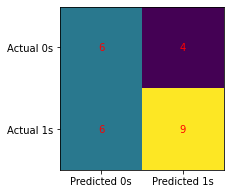

In [449]:
conf_matrix(model, X_test, y_test)

In [450]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.69      0.60      0.64        15

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.59        25
weighted avg       0.62      0.60      0.60        25



#### It is not enough good accuracy. Let's try other binary classifiers

### Support vector machine

In [451]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1,gamma='auto')
score_set['SVM_score'] = train_test_model(model)

Predicted : [1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1]
Score: 0.64


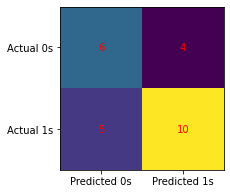

In [452]:
conf_matrix(model, X_test, y_test)

In [453]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.71      0.67      0.69        15

    accuracy                           0.64        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.65      0.64      0.64        25



In [454]:
score_set

LR_score  SVM_score
all_set       0.6       0.64

### Decission Tree

In [455]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

score_set['DTree_score'] = train_test_model(model)


Predicted : [1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1]
Score: 0.44


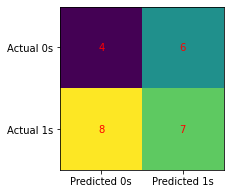

In [456]:
conf_matrix(model, X_test, y_test)

In [457]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        10
           1       0.54      0.47      0.50        15

    accuracy                           0.44        25
   macro avg       0.44      0.43      0.43        25
weighted avg       0.46      0.44      0.45        25



In [458]:
score_set

LR_score  SVM_score  DTree_score
all_set       0.6       0.64         0.44

### Random Forest

In [459]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
model = RandomForestClassifier(n_estimators=100)


In [460]:
score_set['RForest_score'] = train_test_model(model)

Predicted : [1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1]
Score: 0.4


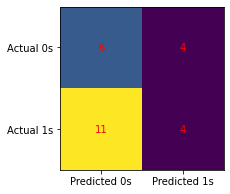

In [461]:
conf_matrix(model, X_test, y_test)

In [462]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.35      0.60      0.44        10
           1       0.50      0.27      0.35        15

    accuracy                           0.40        25
   macro avg       0.43      0.43      0.40        25
weighted avg       0.44      0.40      0.39        25



In [463]:
score_set

LR_score  SVM_score  DTree_score  RForest_score
all_set       0.6       0.64         0.44            0.4

### Naive Bayes

In [464]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
score_set['NB_score'] = train_test_model(model)

Predicted : [1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0]
Score: 0.44


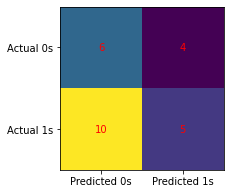

In [465]:
conf_matrix(model, X_test, y_test)

In [466]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.38      0.60      0.46        10
           1       0.56      0.33      0.42        15

    accuracy                           0.44        25
   macro avg       0.47      0.47      0.44        25
weighted avg       0.48      0.44      0.43        25



In [467]:
score_set

LR_score  SVM_score  DTree_score  RForest_score  NB_score
all_set       0.6       0.64         0.44            0.4      0.44

### KNN

In [468]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
score_set['KNN_score'] = train_test_model(model)

Predicted : [1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1]
Score: 0.48


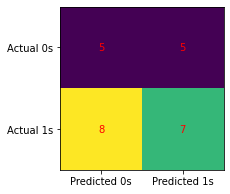

In [469]:
conf_matrix(model, X_test, y_test)

In [470]:
 print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.58      0.47      0.52        15

    accuracy                           0.48        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.50      0.48      0.49        25



In [471]:
score_set

LR_score  SVM_score  DTree_score  RForest_score  NB_score  KNN_score
all_set       0.6       0.64         0.44            0.4      0.44       0.48

#### Logistic Regression and SVM got the best results, but not enough good.

## Correlation exploration

#### To increase model scores, maybe it make sense to decrease amount of features. 
#### For this, we need to find more correlated ones with ADS

#### It is too much features to visualise correlation, that is why I'm dividing them in chunks

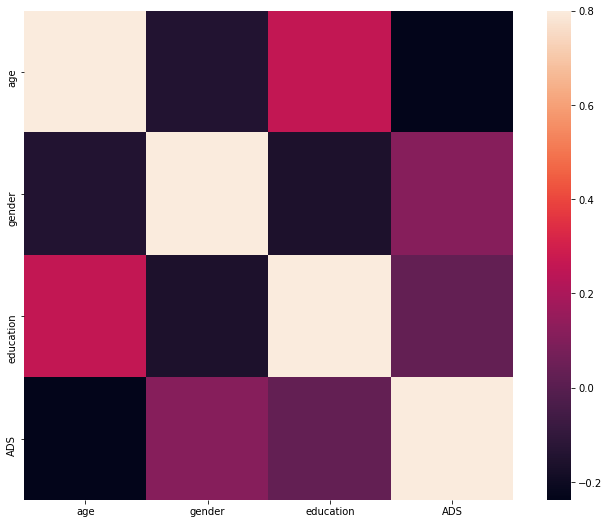

In [472]:
#correlation matrix
df_demograph = df.iloc[:,1:5]
corrmat = df_demograph.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

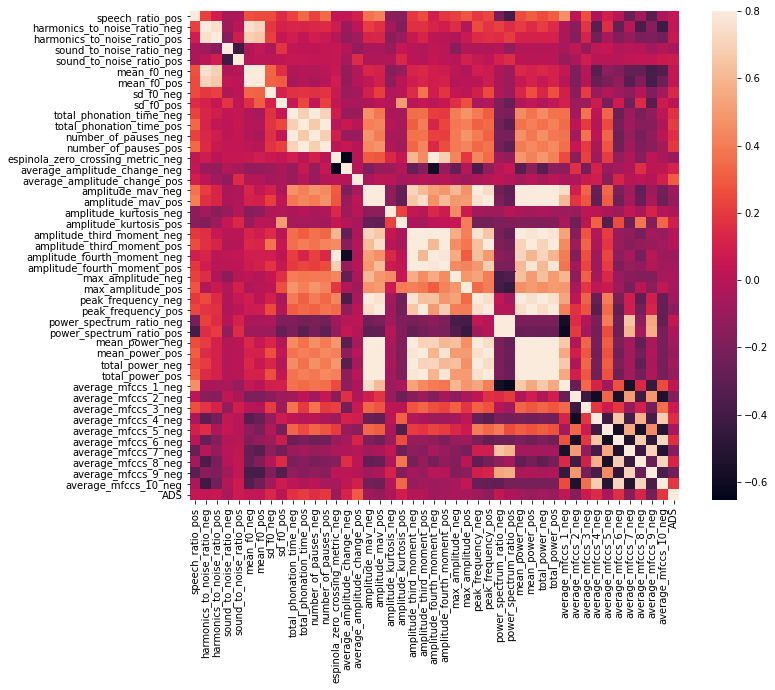

In [473]:
#correlation matrix
df_sf= df.iloc[:,6:50]
df_sf['ADS'] = df['ADS']
corrmat = df_sf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

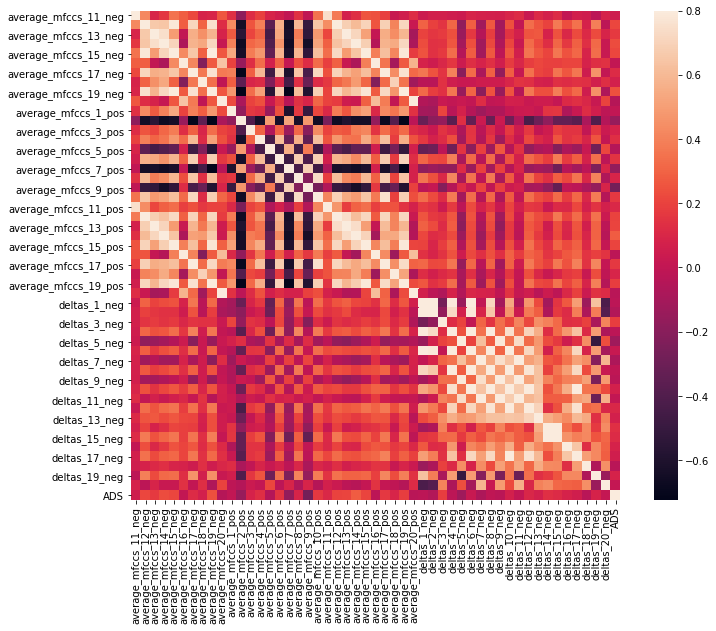

In [474]:
df_sf= df.iloc[:,50:100]
df_sf['ADS'] = df['ADS']
corrmat = df_sf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

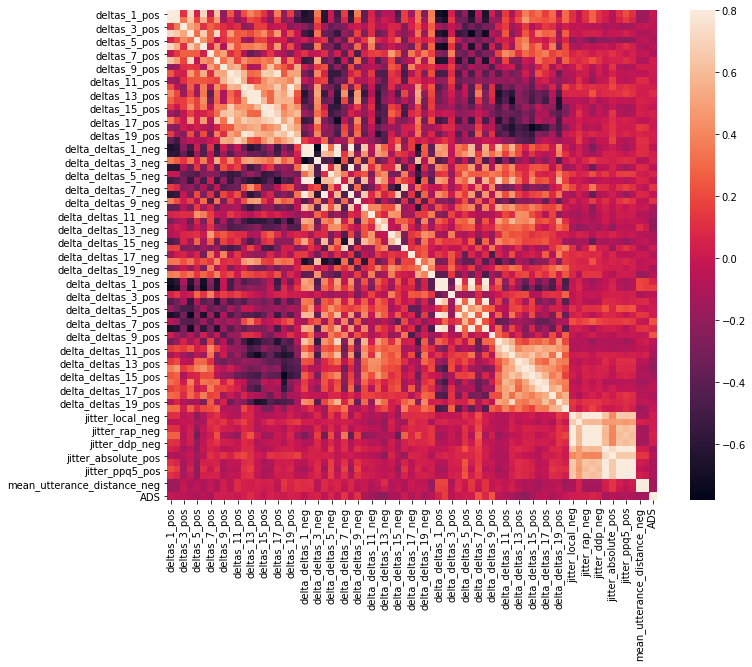

In [475]:
df_sf= df.iloc[:,100:172]
df_sf['ADS'] = df['ADS']
corrmat = df_sf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

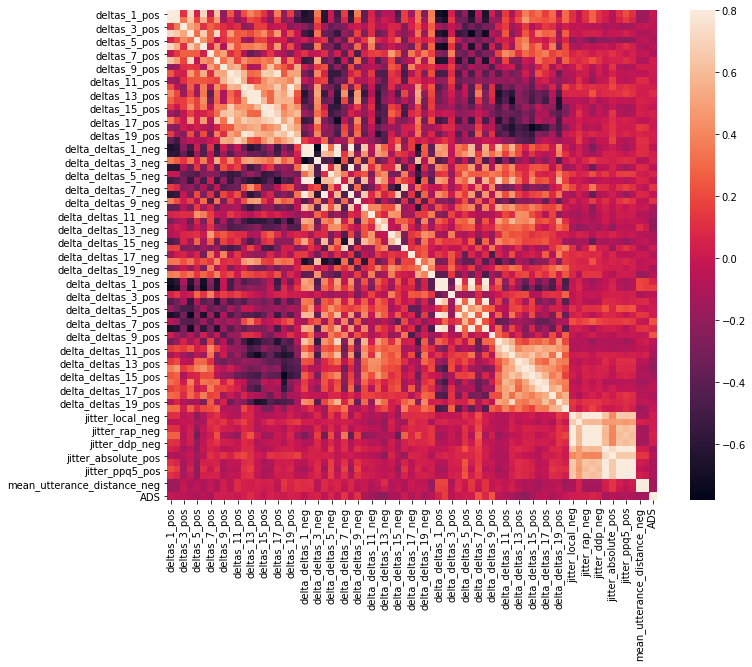

In [476]:
df_tf= df.iloc[:,172:]
df_tf['ADS'] = df['ADS']
corrmat = df_sf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### There is no strong correlation between ADS and another features

#### Extract all features which have at least absolute correlation > 0.2

In [477]:
short_df = df.copy()
short_df = short_df.drop(['id'],axis=1)

corrmat = short_df.corr()

new_feature_set = corrmat[abs(corrmat['ADS']>=0.2)].index
print("New feature set indeses: ")
print(new_feature_set)
selected_columns = short_df[new_feature_set]

short_df = selected_columns.copy()

short_df = short_df.drop('ADS',axis = 1)

New feature set indeses: 
Index(['ADS', 'total_phonation_time_pos', 'average_amplitude_change_pos',
       'average_mfccs_12_neg', 'average_mfccs_14_neg', 'average_mfccs_15_neg',
       'average_mfccs_19_neg', 'average_mfccs_12_pos', 'average_mfccs_13_pos',
       'average_mfccs_14_pos', 'average_mfccs_15_pos', 'delta_deltas_7_pos',
       'delta_deltas_9_pos', 'verb_rate_pos', 'avg_dep_distance_neg',
       'total_dep_distance_neg', 'avg_dependencies_neg',
       'avg_dependencies_pos', 'mean_cluster_size_neg',
       'mean_cluster_density_neg', 'mean_cluster_density_pos',
       'biggest_cluster_density_neg', 'biggest_cluster_density_pos',
       'ADS_cat'],
      dtype='object')


In [478]:
short_df

total_phonation_time_pos  average_amplitude_change_pos  \
0                   -0.558452                      0.214249   
1                   -0.722285                      0.031548   
2                   -0.597483                      0.031548   
3                   -0.601010                     -0.151153   
4                   -1.113319                      0.031548   
..                        ...                           ...   
116                 -1.006740                     -0.529938   
117                 -0.194910                      0.031548   
118                 -0.778966                      9.496738   
119                 -0.549880                      0.031548   
120                  0.138339                      0.031548   

     average_mfccs_12_neg  average_mfccs_14_neg  average_mfccs_15_neg  \
0               -0.054992             -0.320887             -1.266008   
1               -1.309977             -0.002656             -1.291389   
2               -1.124070             -0.073320             -1.193261   
3               -0.351426             -3.213317             -1.897058   
4               -1.245906             -1.241308             -0.905459   
..                    ...                   ...                   ...   
116              1.221853             -0.277674              0.501124   
117              0.268085              0.751175              0.855988   
118              0.128920              0.060198              0.364754   
119              1.142329              0.660509              0.857388   
120              0.116812              1.013403              0.441917   

     average_mfccs_19_neg  average_mfccs_12_pos  average_mfccs_13_pos  \
0               -1.213741              0.133751             -0.258235   
1               -1.231872             -1.519117              0.265191   
2               -1.321495             -1.470648             -0.647582   
3               -1.593073             -0.556407             -1.168249   
4               -1.123748             -0.512042             -0.251500   
..                    ...                   ...                   ...   
116              0.668390              1.583697             -0.256331   
117              0.625160              0.166423              0.264677   
118              1.029890             -0.159296              0.202903   
119              1.232366              0.478121             -0.122913   
120              0.939698              0.205470              1.461946   

     average_mfccs_14_pos  average_mfccs_15_pos  ...  avg_dep_distance_neg  \
0               -0.412261             -1.591062  ...              0.051288   
1               -0.071913             -1.393871  ...              0.809469   
2               -0.137529             -0.603162  ...              0.831566   
3               -2.824940             -1.509052  ...              0.569523   
4               -1.110981             -0.524125  ...             -1.723715   
..                    ...                   ...  ...                   ...   
116             -0.440008              0.265752  ...             -1.700993   
117              0.405470              0.232475  ...             -0.136967   
118              0.268790              0.305408  ...             -1.115589   
119              0.474331              0.340499  ...             -2.676953   
120              1.102018              0.348949  ...              0.434177   

     total_dep_distance_neg  avg_dependencies_neg  avg_dependencies_pos  \
0                 -0.515671             -0.523912             -0.502517   
1                 -0.239641             -0.292447             -0.747468   
2                 -0.330317             -0.383631             -0.681520   
3                 -0.411659             -0.446757             -0.540202   
4                 -0.811703             -0.825519             -1.011262   
..                      ...                   ...                   ...   
116               -0.765032     

In [479]:
short_df['age'] = df['age']
short_df['gender'] = df['gender']
short_df['education'] = df['education']

In [480]:
short_df

total_phonation_time_pos  average_amplitude_change_pos  \
0                   -0.558452                      0.214249   
1                   -0.722285                      0.031548   
2                   -0.597483                      0.031548   
3                   -0.601010                     -0.151153   
4                   -1.113319                      0.031548   
..                        ...                           ...   
116                 -1.006740                     -0.529938   
117                 -0.194910                      0.031548   
118                 -0.778966                      9.496738   
119                 -0.549880                      0.031548   
120                  0.138339                      0.031548   

     average_mfccs_12_neg  average_mfccs_14_neg  average_mfccs_15_neg  \
0               -0.054992             -0.320887             -1.266008   
1               -1.309977             -0.002656             -1.291389   
2               -1.124070             -0.073320             -1.193261   
3               -0.351426             -3.213317             -1.897058   
4               -1.245906             -1.241308             -0.905459   
..                    ...                   ...                   ...   
116              1.221853             -0.277674              0.501124   
117              0.268085              0.751175              0.855988   
118              0.128920              0.060198              0.364754   
119              1.142329              0.660509              0.857388   
120              0.116812              1.013403              0.441917   

     average_mfccs_19_neg  average_mfccs_12_pos  average_mfccs_13_pos  \
0               -1.213741              0.133751             -0.258235   
1               -1.231872             -1.519117              0.265191   
2               -1.321495             -1.470648             -0.647582   
3               -1.593073             -0.556407             -1.168249   
4               -1.123748             -0.512042             -0.251500   
..                    ...                   ...                   ...   
116              0.668390              1.583697             -0.256331   
117              0.625160              0.166423              0.264677   
118              1.029890             -0.159296              0.202903   
119              1.232366              0.478121             -0.122913   
120              0.939698              0.205470              1.461946   

     average_mfccs_14_pos  average_mfccs_15_pos  ...  avg_dependencies_pos  \
0               -0.412261             -1.591062  ...             -0.502517   
1               -0.071913             -1.393871  ...             -0.747468   
2               -0.137529             -0.603162  ...             -0.681520   
3               -2.824940             -1.509052  ...             -0.540202   
4               -1.110981             -0.524125  ...             -1.011262   
..                    ...                   ...  ...                   ...   
116             -0.440008              0.265752  ...             -0.643835   
117              0.405470              0.232475  ...             -0.643835   
118              0.268790              0.305408  ...             -0.606150   
119              0.474331              0.340499  ...             -0.549623   
120              1.102018              0.348949  ...             -0.559044   

     mean_cluster_size_neg  mean_cluster_density_neg  \
0                -1.182748                 -0.696623   
1                 1.561425                 -0.148025   
2                 0.541165                 -0.232592   
3                -0.984214                 -0.699740   
4                -1.242726                 -0.710066   
..                     ...                       ...   
116              -1.341487                 -0.705606   
117               0.749513                  0.027613   
118              -1.188702                 -0.705513 

#### Try to train/validate model with less features. Try it just for LR and SVM for the first approach

In [481]:
X = short_df.copy()
X = X.drop('ADS_cat',axis=1)
y = short_df['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

model = LogisticRegression(solver='liblinear', random_state=0)
score = train_test_model(model)



Predicted : [1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0]
Score: 0.48


In [482]:

model = svm.SVC(kernel='linear', C=1,gamma='auto')
score_set['SVM_score'] = train_test_model(model)

Predicted : [1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0]
Score: 0.52


#### Decreasing features reduced acurracy of algorithms

# Exploration by Gender  

### Divide data by gender

In [483]:
df_male = df[df['gender']=='male']
df.drop(['gender'], axis = 1)
df_female = df[df['gender']=='female']
df.drop(['gender'], axis = 1)

id       age  education       ADS  speech_ratio_neg  speech_ratio_pos  \
0    2274 -0.337651  -0.570196 -0.346049          0.858458          0.651435   
1    2275 -0.491823  -0.996084 -0.545439          0.543699          0.405673   
2    2276 -0.491823  -0.996084  1.049681          0.272393         -0.165992   
3    2282 -0.183478   0.281578 -1.143609          0.000539         -0.239856   
4    2283  0.587385   0.707466 -0.545439         -0.307881         -3.452594   
..    ...       ...        ...       ...               ...               ...   
116  3070 -0.029306   0.707466 -0.545439         -1.029778          0.016299   
117  3073 -0.183478   0.707466  1.049681          0.687354          1.283844   
118  3075 -0.954341  -1.421971  2.246021          0.204106          0.947281   
119  3076 -0.183478   0.707466 -0.744829          0.550328          0.873963   
120  3078 -0.954341  -1.421971 -0.744829          0.542157          0.207944   

     harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
0                        1.067161                      0.713819   
1                        1.986352                     -1.318579   
2                        1.563178                      1.270117   
3                       -2.226519                     -1.834979   
4                       -1.876983                     -1.878655   
..                            ...                           ...   
116                     -1.616271                     -1.297468   
117                     -0.750130                     -0.603392   
118                      0.847052                     -0.196678   
119                     -0.003053                      1.052286   
120                      0.702477                      0.277141   

     sound_to_noise_ratio_neg  sound_to_noise_ratio_pos  ...  \
0                    0.136224                  0.370260  ...   
1                    0.304141                 -0.112932  ...   
2                    0.310208                 -0.227197  ...   
3                    0.766966                  0.251200  ...   
4                    2.068140                 -1.281052  ...   
..                        ...                       ...  ...   
116                 -0.803280                  0.391991  ...   
117                  0.429366                  0.025061  ...   
118                  0.005942                  0.613256  ...   
119                 -0.097169                 -1.185635  ...   
120                 -0.353259                 -0.012409  ...   

     mean_cluster_density_pos  biggest_cluster_density_neg  \
0                   -0.334926                    -0.594576   
1                   -0.878503                    -0.188002   
2                   -0.497999                    -0.274649   
3                   -0.892399                    -0.667893   
4                   -0.894524                    -0.721214   
..                        ...                          ...   
116                 -0.891797                    -0.667893   
117                 -0.463668                    -0.008042   
118                 -0.887979                    -0.667893   
119                 -0.377840                    -0.447943   
120                 -0.386422                     0.158587   

     biggest_cluster_density_pos  number_cluster_switches_neg  \
0                      -0.381359                     0.944992   
1                      -0.850235                    -0.646610   
2                      -0.549447                    -0.646610   
3                      -0.867928                     1.782676   
4                      -0.929855                    -0.395304   
..                           ...                          ...   
116                    -0.850235                    -0.185883   
117                    -0.514060                    -0.646610   
118                    -0.885622                     0.191075   
119                    -0.425593                    -0.646610   
120         

In [484]:
df_male.shape

(0, 213)

In [485]:
df_female.shape

(0, 213)

In [486]:
df_male = df.loc[df['gender']==0]
df_male = df_male.drop('gender',axis=1)
df_female = df.loc[df['gender']==1]
df_female = df_female.drop('gender',axis=1)
df_female

id       age  education       ADS  speech_ratio_neg  speech_ratio_pos  \
0    2274 -0.337651  -0.570196 -0.346049          0.858458          0.651435   
1    2275 -0.491823  -0.996084 -0.545439          0.543699          0.405673   
2    2276 -0.491823  -0.996084  1.049681          0.272393         -0.165992   
7    2291 -0.491823  -0.570196  0.052731          0.110645         -0.243123   
9    2295 -0.491823  -1.847859 -1.143609          1.323419          0.984915   
..    ...       ...        ...       ...               ...               ...   
115  3067  0.895730   0.281578 -1.741779          0.377014          0.909457   
117  3073 -0.183478   0.707466  1.049681          0.687354          1.283844   
118  3075 -0.954341  -1.421971  2.246021          0.204106          0.947281   
119  3076 -0.183478   0.707466 -0.744829          0.550328          0.873963   
120  3078 -0.954341  -1.421971 -0.744829          0.542157          0.207944   

     harmonics_to_noise_ratio_neg  harmonics_to_noise_ratio_pos  \
0                        1.067161                      0.713819   
1                        1.986352                     -1.318579   
2                        1.563178                      1.270117   
7                        0.728910                      0.935664   
9                        0.225417                     -0.071277   
..                            ...                           ...   
115                     -0.324092                      0.480191   
117                     -0.750130                     -0.603392   
118                      0.847052                     -0.196678   
119                     -0.003053                      1.052286   
120                      0.702477                      0.277141   

     sound_to_noise_ratio_neg  sound_to_noise_ratio_pos  ...  \
0                    0.136224                  0.370260  ...   
1                    0.304141                 -0.112932  ...   
2                    0.310208                 -0.227197  ...   
7                    0.375471                 -0.195057  ...   
9                    0.055032                 -0.078909  ...   
..                        ...                       ...  ...   
115                  0.080488                  0.976756  ...   
117                  0.429366                  0.025061  ...   
118                  0.005942                  0.613256  ...   
119                 -0.097169                 -1.185635  ...   
120                 -0.353259                 -0.012409  ...   

     mean_cluster_density_pos  biggest_cluster_density_neg  \
0                   -0.334926                    -0.594576   
1                   -0.878503                    -0.188002   
2                   -0.497999                    -0.274649   
7                   -0.881584                    -0.641232   
9                   -0.885005                    -0.627902   
..                        ...                          ...   
115                 -0.171853                    -0.667893   
117                 -0.463668                    -0.008042   
118                 -0.887979                    -0.667893   
119                 -0.377840                    -0.447943   
120                 -0.386422                     0.158587   

     biggest_cluster_density_pos  number_cluster_switches_neg  \
0                      -0.381359                     0.944992   
1                      -0.850235                    -0.646610   
2                      -0.549447                    -0.646610   
7                      -0.814848                     2.746014   
9                      -0.797154                     2.452824   
..                           ...                          ...   
115                    -0.213272                     1.866445   
117                    -0.514060                    -0.646610   
118                    -0.885622                     0.191075   
119                    -0.425593                    -0.646610   
120         

#### Let's try the male/female datasets for two algorithms with the best accuracy for whole dataset: SVM and Logistic Regression

In [487]:
X = df_male.copy()
X = X.drop('ADS_cat',axis=1)
X = X.drop('ADS',axis=1)
y = df_male['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
model = LogisticRegression(solver='liblinear', random_state=0)
score = train_test_model(model)
gender_score_set =  pd.DataFrame(data = [score] ,columns =['LR_score'], index = ['male'])

X = df_female.copy()
X = X.drop('ADS_cat',axis=1)
X = X.drop('ADS',axis=1)
y = df_female['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
model = LogisticRegression(solver='liblinear', random_state=0)
gender_score_set.loc['female']  = train_test_model(model)

gender_score_set.loc['all_set']  = score_set['LR_score'].loc['all_set']


Predicted : [1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Score: 0.6666666666666666
Predicted : [0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0
 0]
Score: 0.5263157894736842


In [488]:
gender_score_set

LR_score
male     0.666667
female   0.526316
all_set  0.600000

In [489]:
X = df_male.copy()
X = X.drop('ADS_cat',axis=1)
X = X.drop('ADS',axis=1)
y = df_male['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

model = svm.SVC(kernel='linear', C=1,gamma='auto')

score = train_test_model(model)
gender_score_set =  pd.DataFrame(data = [score] ,columns =['SVM_score'], index = ['male'])

X = df_female.copy()
X = X.drop('ADS_cat',axis=1)
X = X.drop('ADS',axis=1)
y = df_female['ADS_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
model = svm.SVC(kernel='linear', C=1,gamma='auto')
gender_score_set.loc['female']  = train_test_model(model)

gender_score_set.loc['all_set']  = score_set['SVM_score'].loc['all_set']


Predicted : [1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Score: 0.6666666666666666
Predicted : [0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0
 0]
Score: 0.631578947368421


In [490]:
gender_score_set

SVM_score
male      0.666667
female    0.631579
all_set   0.520000

#### Dividing on subsets gives higher classification accuracy just in male gender group, and lower for female

## Cross Validation as classification improvement approach

#### Cross validation can help to improve training

### Initial Set

In [503]:
from sklearn.model_selection import cross_val_score, cross_val_predict

def scoring(df):    
    X = df.copy()
    X = X.drop('ADS_cat',axis=1)
    X = X.drop('ADS',axis=1)
    y = df['ADS_cat']
    #----------------------------------------------------------------
    model = LogisticRegression(solver='liblinear', random_state=0)
    scores = cross_val_score(model, df, y, cv=5)
    print("Logistic Regression: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv = pd.DataFrame(data = [scores.max()] ,columns =['LR_score'], index = ['all_set_CV'])
    #----------------------------------------------------------------
    model = svm.SVC(kernel='linear',C=1,gamma='auto')
    scores = cross_val_score(model, df, y, cv=5)
    print("SVM: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv['SVM_score']=scores.max()
    #----------------------------------------------------------------
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, df, y, cv=5)
    print("DTree: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv['DTree_score']=scores.max()
    #----------------------------------------------------------------
    model = RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(model, df, y, cv=5)
    print("RForest: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv['RForest_score']=scores.max()
    #----------------------------------------------------------------
    model = GaussianNB()
    scores = cross_val_score(model, df, y, cv=5)
    print("Naive Bayes: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv['NB_score']=scores.max()
    #----------------------------------------------------------------
    model = KNeighborsClassifier(n_neighbors=3)
    scores = cross_val_score(model, df, y, cv=5)
    print("KNN: ")
    print(f"Score: {scores}")
    print("The best fold score: ", scores.max())

    score_set_cv['KNN_score']=scores.max()
    return score_set_cv
    #----------------------------------------------------------------

score = scoring(df)
print(score)


Logistic Regression: 
Score: [0.92       0.83333333 0.91666667 0.83333333 0.91666667]
The best fold score:  0.92
SVM: 
Score: [0.92       0.91666667 0.875      0.83333333 0.875     ]
The best fold score:  0.92
DTree: 
Score: [1. 1. 1. 1. 1.]
The best fold score:  1.0
RForest: 
Score: [0.96       0.95833333 1.         1.         1.        ]
The best fold score:  1.0
Naive Bayes: 
Score: [1.         1.         0.95833333 1.         1.        ]
The best fold score:  1.0
KNN: 
Score: [0.52       0.45833333 0.33333333 0.625      0.45833333]
The best fold score:  0.625
            LR_score  SVM_score  DTree_score  RForest_score  NB_score  \
all_set_CV      0.92       0.92          1.0            1.0       1.0   

            KNN_score  
all_set_CV      0.625  


            LR_score  SVM_score  DTree_score  RForest_score  NB_score  \
all_set_CV      0.92       0.92          1.0            1.0       1.0   

            KNN_score  
all_set_CV      0.625  


### For Male/Female Subsets

In [505]:
score_set_cv_male = scoring(df_male)
print(score_set_cv_male)

Logistic Regression: 
Score: [0.66666667 0.66666667 0.4        0.8        0.8       ]
The best fold score:  0.8
SVM: 
Score: [0.66666667 0.66666667 0.6        0.8        0.6       ]
The best fold score:  0.8
DTree: 
Score: [1. 1. 1. 1. 1.]
The best fold score:  1.0
RForest: 
Score: [0.66666667 0.66666667 0.8        1.         1.        ]
The best fold score:  1.0
Naive Bayes: 
Score: [1.  1.  0.8 1.  1. ]
The best fold score:  1.0
KNN: 
Score: [0.66666667 0.5        0.4        0.2        0.6       ]
The best fold score:  0.6666666666666666
            LR_score  SVM_score  DTree_score  RForest_score  NB_score  \
all_set_CV       0.8        0.8          1.0            1.0       1.0   

            KNN_score  
all_set_CV   0.666667  


In [506]:
score_set_cv_female = scoring(df_female)
print(score_set_cv_female)

Logistic Regression: 
Score: [0.94736842 0.68421053 0.94736842 0.89473684 0.94444444]
The best fold score:  0.9473684210526315
SVM: 
Score: [0.89473684 0.68421053 0.84210526 0.84210526 0.83333333]
The best fold score:  0.8947368421052632
DTree: 
Score: [1. 1. 1. 1. 1.]
The best fold score:  1.0
RForest: 
Score: [1.         0.78947368 1.         1.         0.88888889]
The best fold score:  1.0
Naive Bayes: 
Score: [1. 1. 1. 1. 1.]
The best fold score:  1.0
KNN: 
Score: [0.47368421 0.31578947 0.26315789 0.68421053 0.5       ]
The best fold score:  0.6842105263157895
            LR_score  SVM_score  DTree_score  RForest_score  NB_score  \
all_set_CV  0.947368   0.894737          1.0            1.0       1.0   

            KNN_score  
all_set_CV   0.684211  


## RESULTS

In [507]:
result = pd.concat([score_set_cv , score_set_cv_male, score_set_cv_female])

In [508]:
result

LR_score  SVM_score  DTree_score  RForest_score  NB_score  \
all_set_CV  0.920000   0.920000          1.0            1.0       1.0   
all_set_CV  0.800000   0.800000          1.0            1.0       1.0   
all_set_CV  0.947368   0.894737          1.0            1.0       1.0   

            KNN_score  
all_set_CV   0.625000  
all_set_CV   0.666667  
all_set_CV   0.684211

## Summary
1. Logistic regression gives the best results on all subsets after cross-validation.
2. SVM has very close (good) results.
3. Decission Tree, Random Forest, Naive Bayes look like overfitting.
4. KNN is not good enough comparing to the first a couple of models.
5. There is a probability that overal modeling results would be better, if having bigger dataset.
